[IPython Notebook](photodynam.ipynb) |  [Python Script](photodynam.py)

Comparing PHOEBE 2.0 vs Photodynam
============================

**NOTE**: Photodynam is an alternate backend and is not installed with PHOEBE 2.0.  In order to run this backend, you'll need to have [photodynam](https://github.com/dfm/photodynam) installed.

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger(clevel='INFO')

b = phoebe.default_binary()
b['q'] = 0.7

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:732: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


In [3]:
b.add_dataset('lc', times=np.linspace(0,3,100), dataset='lc01')
b.add_dataset('rv', times=np.linspace(0,3,100), dataset='rv01')

<ParameterSet: 9 parameters | kinds: rv, rv_dep>

In [4]:
b.set_value_all('pblum_ref', 'self')
# TODO: remove this once support for coupled pblums is added for the jktebop backend

The photodynam backend only support linear limb-darkening.  If we weren't to change ld_func to linear, then it would completely ignore the ld_coeffs set in the system - and then we wouldn't /really/ be comparing the same thing.

In [5]:
b.set_value_all('ld_func', 'linear')
b.set_value_all('ld_coeffs', [0.])

b.set_value_all('ld_func_bol', 'linear')
b.set_value_all('ld_coeffs_bol', [0.])
# TODO: remove this once tested to work correctly with limbdarkening

Running Compute
-----------------------

We'll compare to dynamical RVs from PHOEBE 2 since photodynam does not support the ability for flux-weighted RVs

In [6]:
b.add_compute(compute='phoebe', rv_method='dynamical')

<ParameterSet: 22 parameters | datasets: lc01, rv01>

Now we add compute options for the 'photodynam' backend.

In [7]:
b.add_compute('photodynam', compute='pd')

<ParameterSet: 4 parameters | datasets: lc01, rv01>

In [8]:
b.run_compute(compute='phoebe', model='phoebemodel')

<ParameterSet: 6 parameters | kinds: rv, lc>

In [9]:
b.run_compute(compute='pd', model='pdmodel')

<ParameterSet: 6 parameters | kinds: rv, lc>

Plotting
-------------------------

**NOTE [BUG]:** currently we add +1 to the output fluxes from photodynam in order to reach agreement - not sure why yet

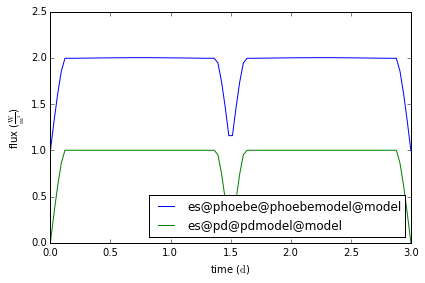

In [10]:
axs, artists = b['lc01@phoebemodel'].plot()
axs, artists = b['lc01@pdmodel'].plot()
leg = plt.legend(loc=4)

Now let's plot the residuals between these two models

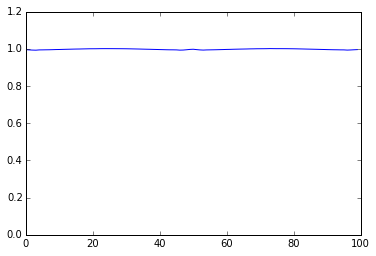

In [11]:
artist, = plt.plot(b.get_value('fluxes@lc01@phoebemodel') - b.get_value('fluxes@lc01@pdmodel'))
artist = plt.axhline(0.0, linestyle='dashed', color='k')

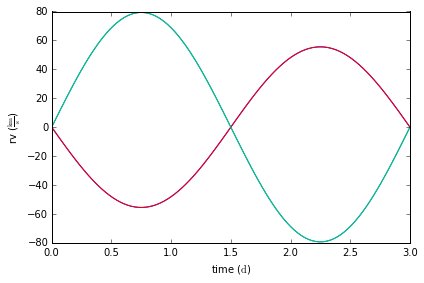

In [12]:
axs, artists = b['rv01@phoebemodel'].plot()
axs, artists = b['rv01@pdmodel'].plot()

And also plot the residuals of both the primary and secondary RVs

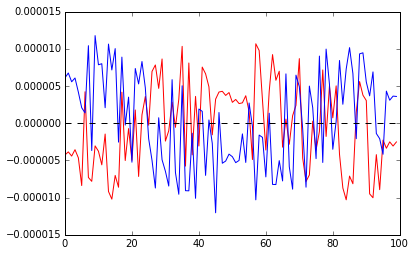

In [13]:
artist, = plt.plot(b.get_value('rvs@rv01@primary@phoebemodel') - b.get_value('rvs@rv01@primary@pdmodel'), color='r')
artist, = plt.plot(b.get_value('rvs@rv01@secondary@phoebemodel') - b.get_value('rvs@rv01@secondary@pdmodel'), color='b')
artist = plt.axhline(0.0, linestyle='dashed', color='k')